In [50]:
import os
import collections
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

data_dir = "/home/stavros/DATA/TripAdvisorReviews"

In [2]:
data = pd.read_pickle(os.path.join(data_dir, "kresten_royal/the_kresten_royal_villas_1747reviews_withaspects.pkl"))
data.shape

(1747, 27)

In [6]:
from sklearn import feature_extraction
import nltk

stopwords = nltk.corpus.stopwords.words("english")

In [23]:
tfidf = feature_extraction.text.TfidfVectorizer(stop_words=stopwords)
tdf_mat = tfidf.fit_transform(data.lemmatized_text)
tdf_mat

<1747x9186 sparse matrix of type '<class 'numpy.float64'>'
	with 175501 stored elements in Compressed Sparse Row format>

In [39]:
vocab = tfidf.vocabulary_
inv_vocab = {v: k for k, v in tfidf.vocabulary_.items()}

In [44]:
tfidf_words = []
for review_mat in tdf_mat:
    review_vec = np.array(review_mat.todense())[0]
    assert review_vec.shape == (len(vocab),)
    ids = np.where(review_vec > 0)[0]
    tfidf_words.append(collections.Counter({inv_vocab[i]: review_vec[i] for i in ids}))
print(len(tfidf_words))

1747


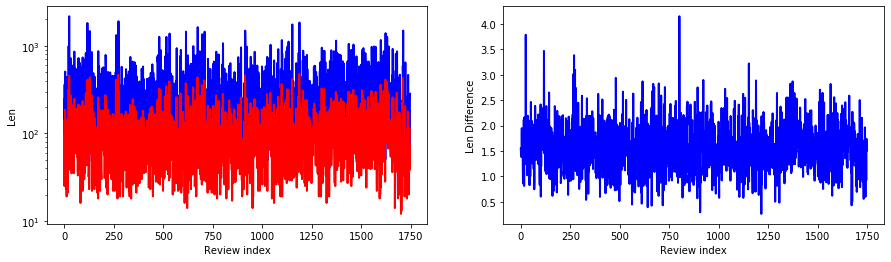

In [55]:
lemmatized_lens = data.lemmatized_text.map(lambda x: len(x.split(" ")))
tfidf_lens = [len(x) for x in tfidf_words]

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.semilogy(lemmatized_lens, color="blue", linewidth=2.0)
plt.semilogy(tfidf_lens, color="red", linewidth=2.0)
plt.xlabel("Review index")
plt.ylabel("Len")

plt.subplot(122)
plt.plot((lemmatized_lens - tfidf_lens) / tfidf_lens, color="blue", linewidth=2.0)
plt.xlabel("Review index")
plt.ylabel("Len Difference")

plt.show()

In [48]:
data.aspects[0]

Counter({'music': 1,
         'bath': 1,
         'view': 1,
         'plentiful': 1,
         'variety': 1,
         'service': 1,
         'holiday': 1,
         'hotel': 1})

In [56]:
aspects_tfidf_scores = [collections.Counter({a: scores[a] for a in aspects})
                        for aspects, scores in zip(data.aspects, tfidf_words)]print(len(mean_aspect_tfidf_score))

In [58]:
mean_aspect_tfidf_score = np.array([np.mean(list(counter.values())) for counter in aspects_tfidf_scores])
print(mean_aspect_tfidf_score.shape)

(1747,)


/home/stavros/PythonEvironments/nlp-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/stavros/PythonEvironments/nlp-env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [71]:
tfidf_means, tfidf_stds = [], []
for review_mat in tdf_mat:
    review_vec = np.array(review_mat.todense())[0]
    assert review_vec.shape == (len(vocab),)
    valid = review_vec > 0
    tfidf_means.append(review_vec[valid].mean())
    tfidf_stds.append(review_vec[valid].std())
tfidf_means = np.array(tfidf_means)
tfidf_stds = np.array(tfidf_stds)
print(tfidf_means.shape, tfidf_stds.shape)

(1747,) (1747,)


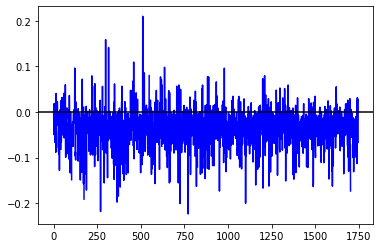

In [76]:
plt.plot(mean_aspect_tfidf_score - tfidf_means, color="blue")
plt.axhline(y=0, color="black")
plt.show()

In [89]:
all_aspect_tfidf_scores = np.array([x for a in aspects_tfidf_scores for x in a.values()])
print(all_aspect_tfidf_scores.shape)

(12893,)


In [80]:
all_tfidf_scores = []
for review_mat in tdf_mat:
    review_vec = np.array(review_mat.todense())[0]
    assert review_vec.shape == (len(vocab),)
    all_tfidf_scores.append(review_vec[review_vec > 0])
all_tfidf_scores = np.array([x for y in all_tfidf_scores for x in y])
print(all_tfidf_scores.shape)

(175501,)


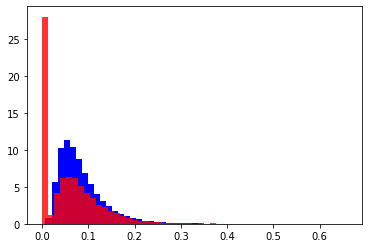

In [95]:
plt.hist(all_tfidf_scores, bins=50, color="blue", density=True)
plt.hist(all_aspect_tfidf_scores, bins=50, color="red", density=True, alpha=0.8)
plt.show()